1. Linear SVM By sklearn.svm

w = [0.48902282 0.56720543]
b = -0.8621617535013728
(-3,-3)预测结果： [0]
(0,5)预测结果： [1]


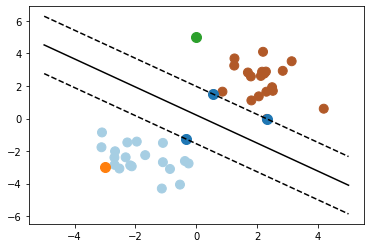

In [4]:
import numpy as np  
import matplotlib.pylab as plt
from sklearn import svm  

#生成随机分布的点
np.random.seed(1)  
X=np.r_[np.random.randn(20,2)-[2,2],np.random.randn(20,2)+[2,2]]  
Y=[0]*20+[1]*20

#在图中画出随机分布的点
plt.scatter(X[:,0],X[:,1],c=Y,s=80,cmap=plt.cm.Paired) 

#这里是SVM核心算法函数 
clf=svm.SVC(kernel='linear')  
clf.fit(X,Y)
  
#画出分割线  
w=clf.coef_[0]  
print('w =',w)
a=-w[0]/w[1]  #得到斜率
print('b =', a)
xx=np.linspace(-5,5)  
yy=a*xx-(clf.intercept_[0])/w[1]  
plt.plot(xx,yy,'k-')
  
#在图中画出支持向量的点的两条直线
b=clf.support_vectors_[0]  
yy_down=a*xx+(b[1]-a*b[0])  
b=clf.support_vectors_[-1]  
yy_up=a*xx+(b[1]-a*b[0])
plt.plot(xx,yy_down,'k--')  
plt.plot(xx,yy_up,'k--')  

#将支持向量的点特殊显示  
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=100)

#在图中显示需要预测的点
test_x1, test_y1 = (-3, -3)
test_x2, test_y2 = (0, 5)
plt.scatter([test_x1],[test_y1],s=100)
plt.scatter([test_x2],[test_y2],s=100)
Z1 = clf.predict([[test_x1, test_y1]])
Z2 = clf.predict([[test_x2, test_y2]])
print('(-3,-3)预测结果：',Z1)  #显示预测结果
print('(0,5)预测结果：',Z2)  #显示预测结果

plt.show()

X =
 [[0 0]
 [1 1]
 [0 2]]
Y =
 [-1 -1  1]
w = [-1.  1.]
b= -1.0


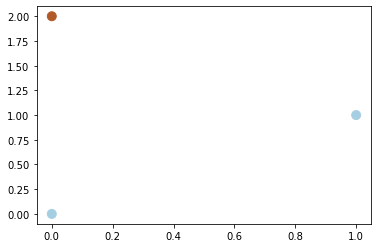

In [2]:
import numpy as np 
import matplotlib.pylab as plt
from sklearn import svm 
X=np.array([[0,0],[1,1],[0,2]])
print('X =\n',X)
Y=np.array([-1,-1,1])
print('Y =\n',Y)
plt.scatter(X[:,0],X[:,1],c=Y,s=80,cmap=plt.cm.Paired) 
clf=svm.SVC(kernel='linear')  
clf.fit(X,Y)
w=clf.coef_[0]  
print('w =',w)
print('b=',clf.intercept_[0]) #b=-1

In [1]:
import numpy as np  
from sklearn import svm   
X=np.array([[0,0,0],[1,1,1],[0,1,1],[0,1,0]])
Y=np.array([-1,-1,1,1])

#这里是SVM核心算法函数 
clf=svm.SVC(kernel='linear')  
clf.fit(X,Y)
  
#画出分割线  
w=clf.coef_[0]  
print('w =',w)
b=clf.intercept_[0]  #得到斜率
print('b =', b)

w = [-1.  1.  0.]
b = -0.5


2. Kernel SVM: Double Moons

X train shape (300, 2)
X test shape (200, 2)
Computation Time for HingeKSVM 0.0019104480743408203
Train accuracy of KSVC: 1.0
Test accuracy of KSVC: 1.0
Number of SV for each class : [5 4]
Number of support vectors for HingeKSVM: 9
Dual coefficients of the support vector in the decision function:
 [[ -9.61298435  -3.48342308  -3.19043189  -0.32965146 -64.
   19.00614041  21.32819597   2.68981352  37.59234089]]
Indices of support vectors for HingeKSVM:
 [  0  16  41 113 254 121 129 190 263]
Total number of SV on canonical hyperplane: 5


Text(0, 0.5, '特征2')

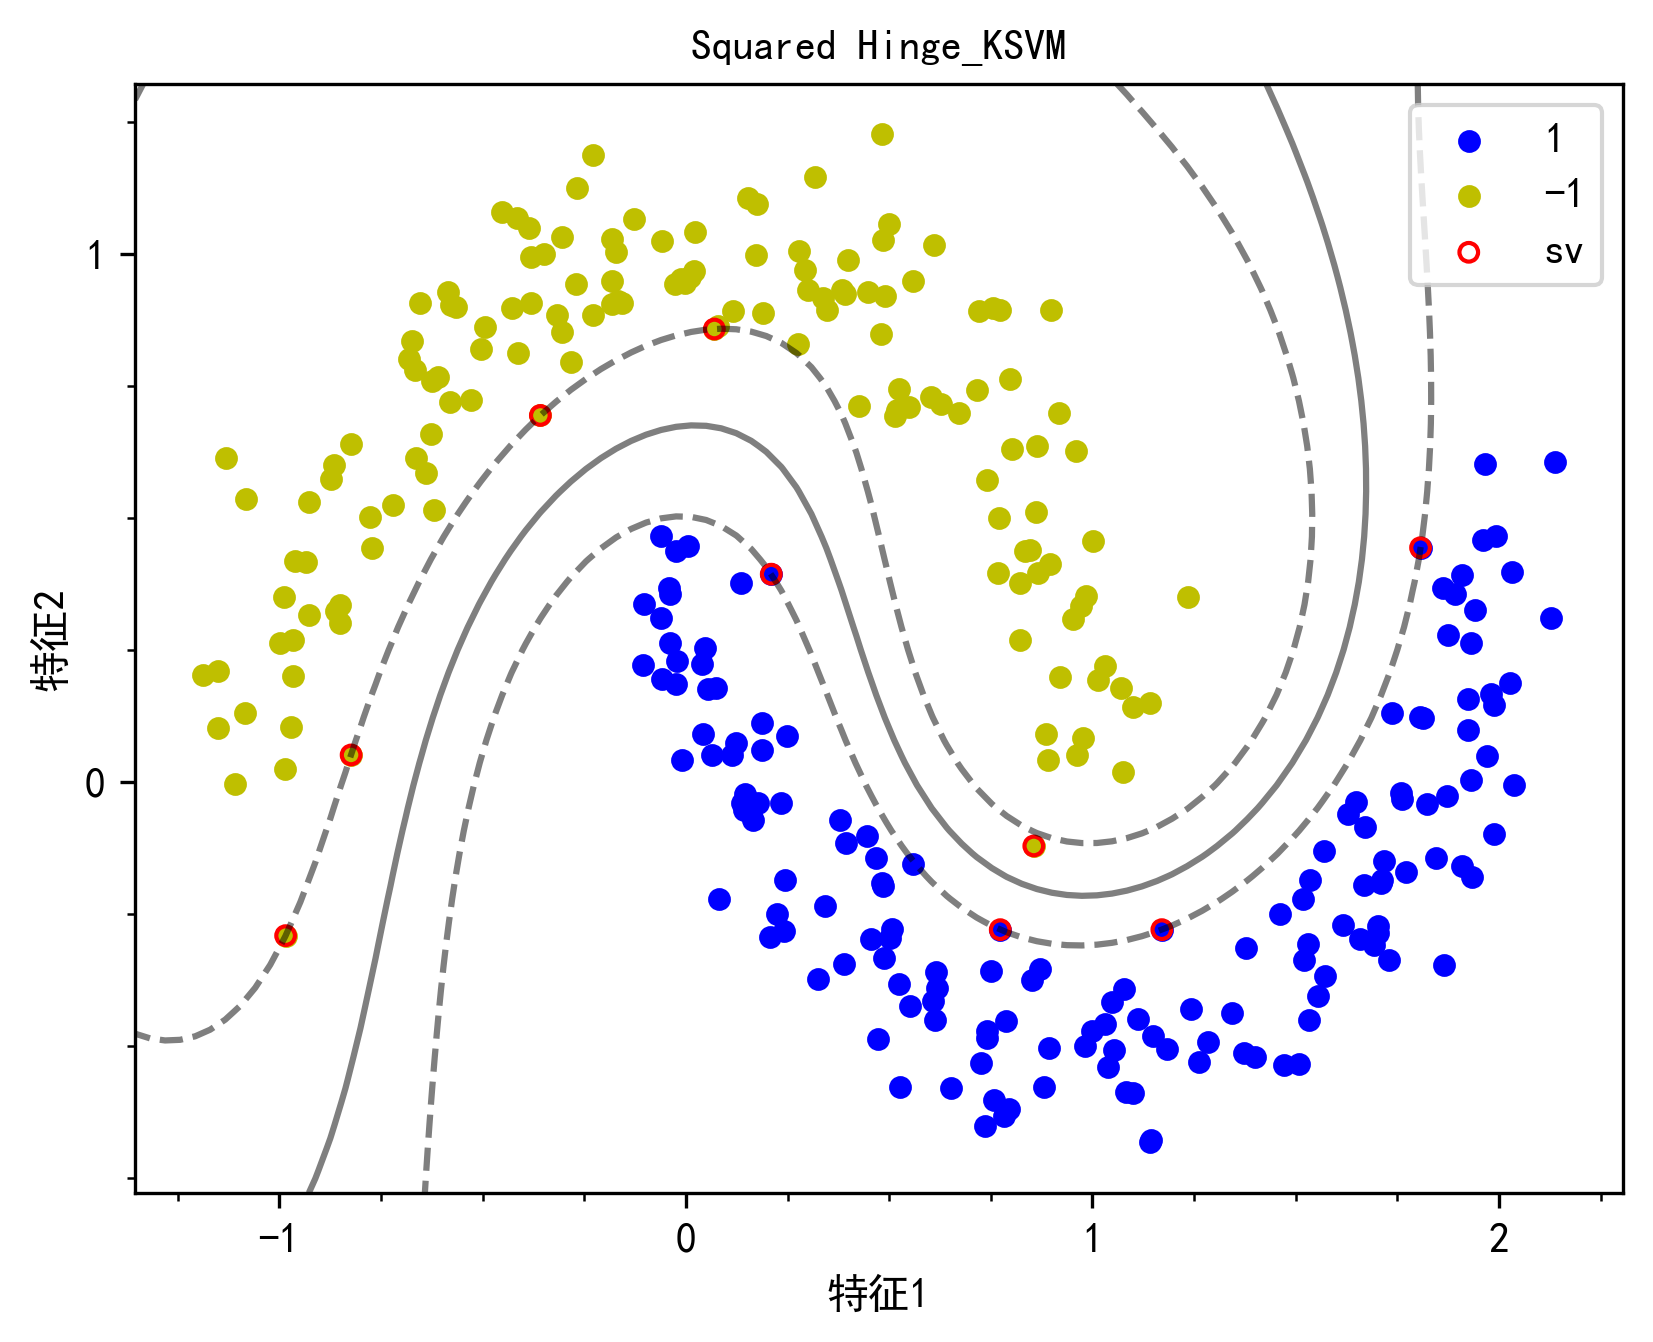

In [5]:
#KSVM Double Moons
#Packages
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy import linalg
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.metrics.pairwise import pairwise_kernels  
from sklearn.datasets import make_moons
import time


import matplotlib as mpl
mpl.rcParams["font.sans-serif"]=["SimHei"] 
mpl.rcParams["axes.unicode_minus"]=False


from matplotlib.ticker import AutoMinorLocator, MultipleLocator
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.xaxis.set_major_locator (MultipleLocator(1.0))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator (MultipleLocator(1.0))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
#random.seed(6)

#Dataset Double Moons
X_moon,Y_moon = make_moons(n_samples=500,shuffle=True,noise=0.1,random_state=3) #noise level noise=0.1
Y_moon[Y_moon==0]=-1  #Transform label 0，1 to label -1，1
X_train,X_test,y_train,y_test = train_test_split(X_moon,Y_moon,test_size=0.4,random_state=33)
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)


#Standard Gaussian Kernel SVM with Squared Hinge Loss
start1 = time.time()
#if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
clf=SVC(C=64,kernel='rbf').fit(X_train,y_train)  #default='squared_hinge'
end1 = time.time()
print('Computation Time for HingeKSVM',end1-start1)
print('Train accuracy of KSVC:',clf.score(X_train,y_train))
print('Test accuracy of KSVC:',clf.score(X_test,y_test))
print('Number of SV for each class :',clf.n_support_)
print('Number of support vectors for HingeKSVM:',np.sum(clf.n_support_))
print('Dual coefficients of the support vector in the decision function:\n',clf.dual_coef_)
print('Indices of support vectors for HingeKSVM:\n',clf.support_)
support_vectors =clf.support_vectors_  #Support vectors.
#Decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
decision_function = clf.decision_function(X_train)
support_vector_indices_canonical = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
print('Total number of SV on canonical hyperplane:',support_vector_indices_canonical.shape[0])


plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams['font.size'] = '10'
#plt.rcParams['figure.figsize'] = (8.0, 4.0) 
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=10, cmap=plt.cm.Paired)
idx_1 = np.where(y_train==1)
p1 = plt.scatter(X_train[idx_1,0], X_train[idx_1,1], marker = 'o', color = 'b', label='1', s = 20)
idx_2 = np.where(y_train==-1)
p2 = plt.scatter(X_train[idx_2,0], X_train[idx_2,1], marker = 'o', color = 'y', label='-1', s = 20)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx,yy,Z,colors='k',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(support_vectors[:, 0],support_vectors[:, 1],s=20,linewidth=1,facecolors='none',edgecolors='r',label='sv')

plt.legend(loc = 'upper right')
plt.title('Squared Hinge_KSVM',fontsize=10)
plt.xlabel('特征1')
plt.ylabel('特征2')
#plt.savefig('HingeKSVM_DoubleMoon.png', bbox_inches='tight')

3. XOR Problem

Train accuracy of KSVC: 1.0
Number of SV for each class : [2 2]
Number of support vectors for HingeKSVM: 4
Dual coefficients of the support vector in the decision function:
 [[-0.90455178 -0.33325592  0.61883749  0.6189702 ]]
Indices of support vectors for HingeKSVM:
 [0 1 2 3]
Total number of SV on canonical hyperplane: 3


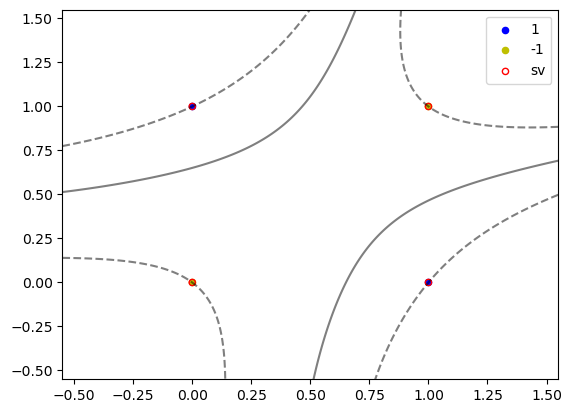

In [31]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#import time


X_train=np.array([[0,0],[1,1],[0,1],[1,0]])
y_train=np.array([-1,-1,1,1])

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=2)

#clf=SVC(C=5,kernel='rbf',gamma=1).fit(X_train,y_train)  #default='squared_hinge'
clf=SVC(C=5,kernel='poly',gamma=1,coef0=1).fit(X_train,y_train)

print('Train accuracy of KSVC:',clf.score(X_train,y_train))
print('Number of SV for each class :',clf.n_support_)
print('Number of support vectors for HingeKSVM:',np.sum(clf.n_support_))
print('Dual coefficients of the support vector in the decision function:\n',clf.dual_coef_)
print('Indices of support vectors for HingeKSVM:\n',clf.support_)
support_vectors =clf.support_vectors_  #Support vectors.
#Decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
decision_function = clf.decision_function(X_train)
support_vector_indices_canonical = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
print('Total number of SV on canonical hyperplane:',support_vector_indices_canonical.shape[0])


idx_1 = np.where(y_train==1)
plt.scatter(X_train[idx_1,0], X_train[idx_1,1], marker = 'o', color = 'b', label='1', s = 20)
idx_2 = np.where(y_train==-1)
plt.scatter(X_train[idx_2,0], X_train[idx_2,1], marker = 'o', color = 'y', label='-1', s = 20)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0]-0.5, xlim[1]+0.5, 200), np.linspace(ylim[0]-0.5, ylim[1]+0.5,200))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#print('Z',Z)
plt.contour(xx,yy,Z,colors='k',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(support_vectors[:, 0],support_vectors[:, 1],s=20,linewidth=1,facecolors='none',edgecolors='r',label='sv')
plt.legend(loc = 'upper right')

4. XOR dataset by sklearn.svm

Train accuracy of KSVC: 0.985
Test accuracy of KSVC: 0.965
Number of SV for each class : [21 24]
Number of support vectors for HingeKSVM: 45
Dual coefficients of the support vector in the decision function:
 [[-10.         -10.         -10.         -10.         -10.
  -10.          -2.28984914 -10.          -6.60207661  -2.74035115
   -8.36690997  -8.18413069 -10.          -1.38539992  -0.53807734
  -10.         -10.         -10.         -10.          -3.10063856
   -8.741236     9.01265142   1.8941575    0.79337256  10.
   10.          10.          10.          10.           1.84778981
   10.          10.          10.           3.77316665   9.24038109
   10.          10.           0.28361133  10.           1.70162044
    0.09831357   3.00043179  10.           0.30317324  10.        ]]
Indices of support vectors for HingeKSVM:
 [ 10  16  17  56  69  70  72  92  94 100 117 130 135 139 141 152 158 160
 170 184 188   0  15  18  25  28  30  33  34  41  42  45  49  55  63  77
  84  91 111 1

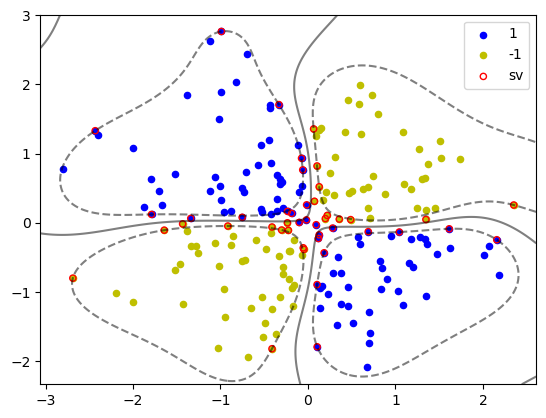

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#import time

X = np.random.randn(400,2)
y = np.logical_xor(X[:,0]>0,X[:,1]>0)
y = np.where(y,1,-1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=2)
#print('X train shape',X_train.shape)
#print('X test shape',X_test.shape)


#if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
clf=SVC(C=10,kernel='rbf',gamma=1).fit(X_train,y_train)  #default='squared_hinge'

print('Train accuracy of KSVC:',clf.score(X_train,y_train))
print('Test accuracy of KSVC:',clf.score(X_test,y_test))
print('Number of SV for each class :',clf.n_support_)
print('Number of support vectors for HingeKSVM:',np.sum(clf.n_support_))
print('Dual coefficients of the support vector in the decision function:\n',clf.dual_coef_)
print('Indices of support vectors for HingeKSVM:\n',clf.support_)
support_vectors =clf.support_vectors_  #Support vectors.
#Decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
decision_function = clf.decision_function(X_train)
support_vector_indices_canonical = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
print('Total number of SV on canonical hyperplane:',support_vector_indices_canonical.shape[0])


sv_labels= clf.dual_coef_.ravel()>0
print('sv labels', sv_labels)

#plt.rcParams['figure.dpi'] = 300 #分辨率
#plt.rcParams['font.size'] = '10'
#plt.rcParams['figure.figsize'] = (8.0, 4.0) 
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=10, cmap=plt.cm.Paired)
idx_1 = np.where(y_train==1)
plt.scatter(X_train[idx_1,0], X_train[idx_1,1], marker = 'o', color = 'b', label='1', s = 20)
idx_2 = np.where(y_train==-1)
plt.scatter(X_train[idx_2,0], X_train[idx_2,1], marker = 'o', color = 'y', label='-1', s = 20)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200), np.linspace(ylim[0], ylim[1], 200))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx,yy,Z,colors='k',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(support_vectors[:, 0],support_vectors[:, 1],s=20,linewidth=1,facecolors='none',edgecolors='r',label='sv')
plt.legend(loc = 'upper right')
#plt.title('Squared Hinge_KSVM',fontsize=10)
#plt.savefig('HingeKSVM_DoubleMoon.png', bbox_inches='tight')

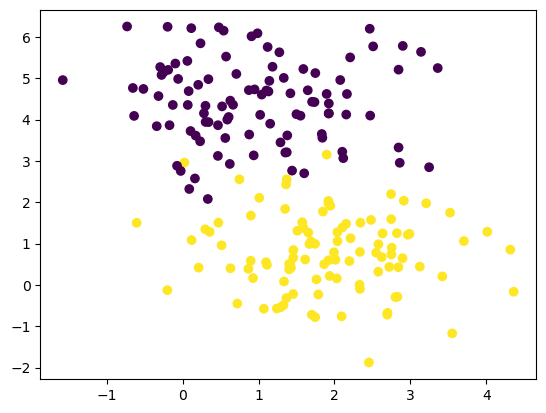

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=2, n_features=2,random_state=0)
plt.scatter(X[:,0], X[:,1],c=y, marker = 'o')
plt.show()

# centers = [[1, 1], [-1, -1], [1, -1]]
# X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

5. KSVM Digits 10 Classes

In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
### 导入数据
digits=load_digits()
### 分割数据集为训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.25,random_state=33)
print("X_train original shape", X_train.shape)
### 标准化数据
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)
### 模型训练和预测 ### 1.惩罚参数的影响:分别取C=0.001,0.01,0.1,1,10,100,1000 ###
lsvc=LinearSVC(C=1, penalty="l2",loss='hinge')
lsvc.fit(X_train,y_train)
y_predict=lsvc.predict(X_test)
### 性能评估
print('Accuracy of Linear SVC:',lsvc.score(X_test,y_test))
print(classification_report(y_test,y_predict,target_names
=digits.target_names.astype(str)))
### 2.1多项式核的影响:分别取degree=1,2,3,4,5,6,7 ###
lsvc1=SVC(C=1,kernel='poly',degree=2)
#默认loss='squared_hinge',不能修改
lsvc1.fit(X_train,y_train)
y_predict=lsvc1.predict(X_test)
### 性能评估
print('Accuracy of SVC of poly kernel:',lsvc1.score(X_test,y_test))
print(classification_report(y_test,y_predict,target_names=digits.target_names.astype(str)))
### 2.2高斯核的影响:分别取gamma=0.001,0.01,0.1,1,10,100,1000 ###
lsvc2=SVC(C=1,kernel='rbf',gamma=0.01)
lsvc2.fit(X_train,y_train)
y_predict=lsvc2.predict(X_test)
### 性能评估
print('Accuracy of SVC of rbf kernel:',lsvc2.score(X_test,y_test))
print(classification_report(y_test,y_predict,target_names=digits.target_names.astype(str)))

X_train original shape (1347, 64)
Accuracy of Linear SVC: 0.94
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        35
           1       0.95      0.98      0.96        54
           2       0.96      1.00      0.98        44
           3       0.95      0.91      0.93        46
           4       0.97      1.00      0.99        35
           5       0.90      0.92      0.91        48
           6       0.96      0.98      0.97        51
           7       0.95      1.00      0.97        35
           8       0.94      0.81      0.87        58
           9       0.95      0.86      0.90        44

    accuracy                           0.94       450
   macro avg       0.94      0.95      0.94       450
weighted avg       0.94      0.94      0.94       450



D:\Software\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy of SVC of poly kernel: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.98      1.00      0.99        54
           2       1.00      1.00      1.00        44
           3       0.96      0.96      0.96        46
           4       1.00      0.91      0.96        35
           5       0.98      0.98      0.98        48
           6       0.98      0.98      0.98        51
           7       1.00      1.00      1.00        35
           8       0.93      0.97      0.95        58
           9       0.98      0.98      0.98        44

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

Accuracy of SVC of rbf kernel: 0.9844444444444445
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.98      1.

6. GridSearchCV 网格搜索交叉验证

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
 
#下载数据
digits = datasets.load_digits()
#print(digits.images)
n_sample = len(digits.images)
#把数据转换为二维数据，x的行数据是不同样本数据，列是样本属性。
x = digits.images.reshape(n_sample, -1)#取数据的所有行第一列数据
y = digits.target
#print(x)
 
#以下方法确定解释变量只能有一个，但是多个解释变量该怎么处理呢,答案是x包含了众多解释变量
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)
 
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['precision', 'recall']
for score in scores:
    print('Tuning hyper-parameters for %s'%score)
    print()
    #利用网格搜索算法构建评估器模型，并且对数据进行评估
    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, scoring='%s_macro'%score)
    clf.fit(x_train, y_train)
    print('最优参数：',clf.best_params_)
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print('网格数据得分：','%0.3f (+/-%0.3f) for %r'%(mean, std, params)) 
    #这个std有的文章乘以2，但个人不知道为什么需要乘以2，如有明白的朋友，求指点。
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(y_true)
    print(classification_report(y_true, y_pred))

#在获取最优超参数之后， 用5折交叉验证来评估模型  
clf = SVC(kernel='rbf', C=1, gamma=1e-3)#最优模型
#对模型进行评分
scores = cross_val_score(clf, x, y, cv=5)
print(scores)


Tuning hyper-parameters for precision

最优参数： {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

网格数据得分： 0.989 (+/-0.003) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
网格数据得分： 0.970 (+/-0.007) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
网格数据得分： 0.991 (+/-0.003) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
网格数据得分： 0.987 (+/-0.006) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
网格数据得分： 0.991 (+/-0.003) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
网格数据得分： 0.988 (+/-0.006) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
网格数据得分： 0.991 (+/-0.003) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
网格数据得分： 0.988 (+/-0.006) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
网格数据得分： 0.984 (+/-0.007) for {'C': 1, 'kernel': 'linear'}
网格数据得分： 0.984 (+/-0.007) for {'C': 10, 'kernel': 'linear'}
网格数据得分： 0.984 (+/-0.007) for {'C': 100, 'kernel': 'linear'}
网格数据得分： 0.984 (+/-0.007) for {'C': 1000, 'kernel': 'linear'}

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 

$$
\min_x \frac12 x^{\top}Px+q^{\top}x\mbox{ s.t. }Gx\le h, Ax=b,lb\le x\le ub
$$
https://qpsolvers.github.io/qpsolvers/quadratic-programming.html#qpsolvers.solve_qp

https://github.com/qpsolvers/qpsolvers

7. QP by qpsolvers

In [ ]:
import numpy as np
from qpsolvers import Problem, solve_problem

M = np.array([[1., 2., 0.], [-8., 3., 2.], [0., 1., 1.]])
P = M.T.dot(M)  # quick way to build a symmetric matrix
q = np.array([3., 2., 3.]).dot(M).reshape((3,))
G = np.array([[1., 2., 1.], [2., 0., 1.], [-1., 2., -1.]])
h = np.array([3., 2., -2.]).reshape((3,))
A = np.array([1., 1., 1.])
b = np.array([1.])
lb =  -1*np.ones(3)
ub = 0.7 * np.ones(3)


problem = Problem(P, q, G, h, A, b, lb, ub)
solution = solve_problem(problem, solver='osqp')
print(solution)

print(f"- Solution is{'' if solution.is_optimal(1e-8) else ' NOT'} optimal")
print(f"- Primal residual: {solution.primal_residual():.1e}")
print(f"- Dual residual: {solution.dual_residual():.1e}")
print(f"- Duality gap: {solution.duality_gap():.1e}")

8. LSVM for XOR Problem (for slides example)

P =
 [[ 1.          0.13533528 -0.36787944 -0.36787944]
 [ 0.13533528  1.         -0.36787944 -0.36787944]
 [-0.36787944 -0.36787944  1.          0.13533528]
 [-0.36787944 -0.36787944  0.13533528  1.        ]]
- Solution is NOT optimal
Solution vector for the primal quadratic program=
 [2.4999971 2.4999971 2.4999971 2.4999971]
Dual multipliers for linear inequality constraints=
 [0.         0.         0.         0.         0.00106008 0.00106008
 0.00106008 0.00106008]
- Primal residual: 8.9e-16
(4,)
b = 4.440892098500626e-16
predict [-0.99893984 -0.99893984  0.99893984  0.99893984]


D:\Software\anaconda\jupyter\Lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
D:\Software\anaconda\jupyter\Lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
D:\Software\anaconda\jupyter\Lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


Text(0.5, 1.0, 'C = 2.5, total SV = 4')

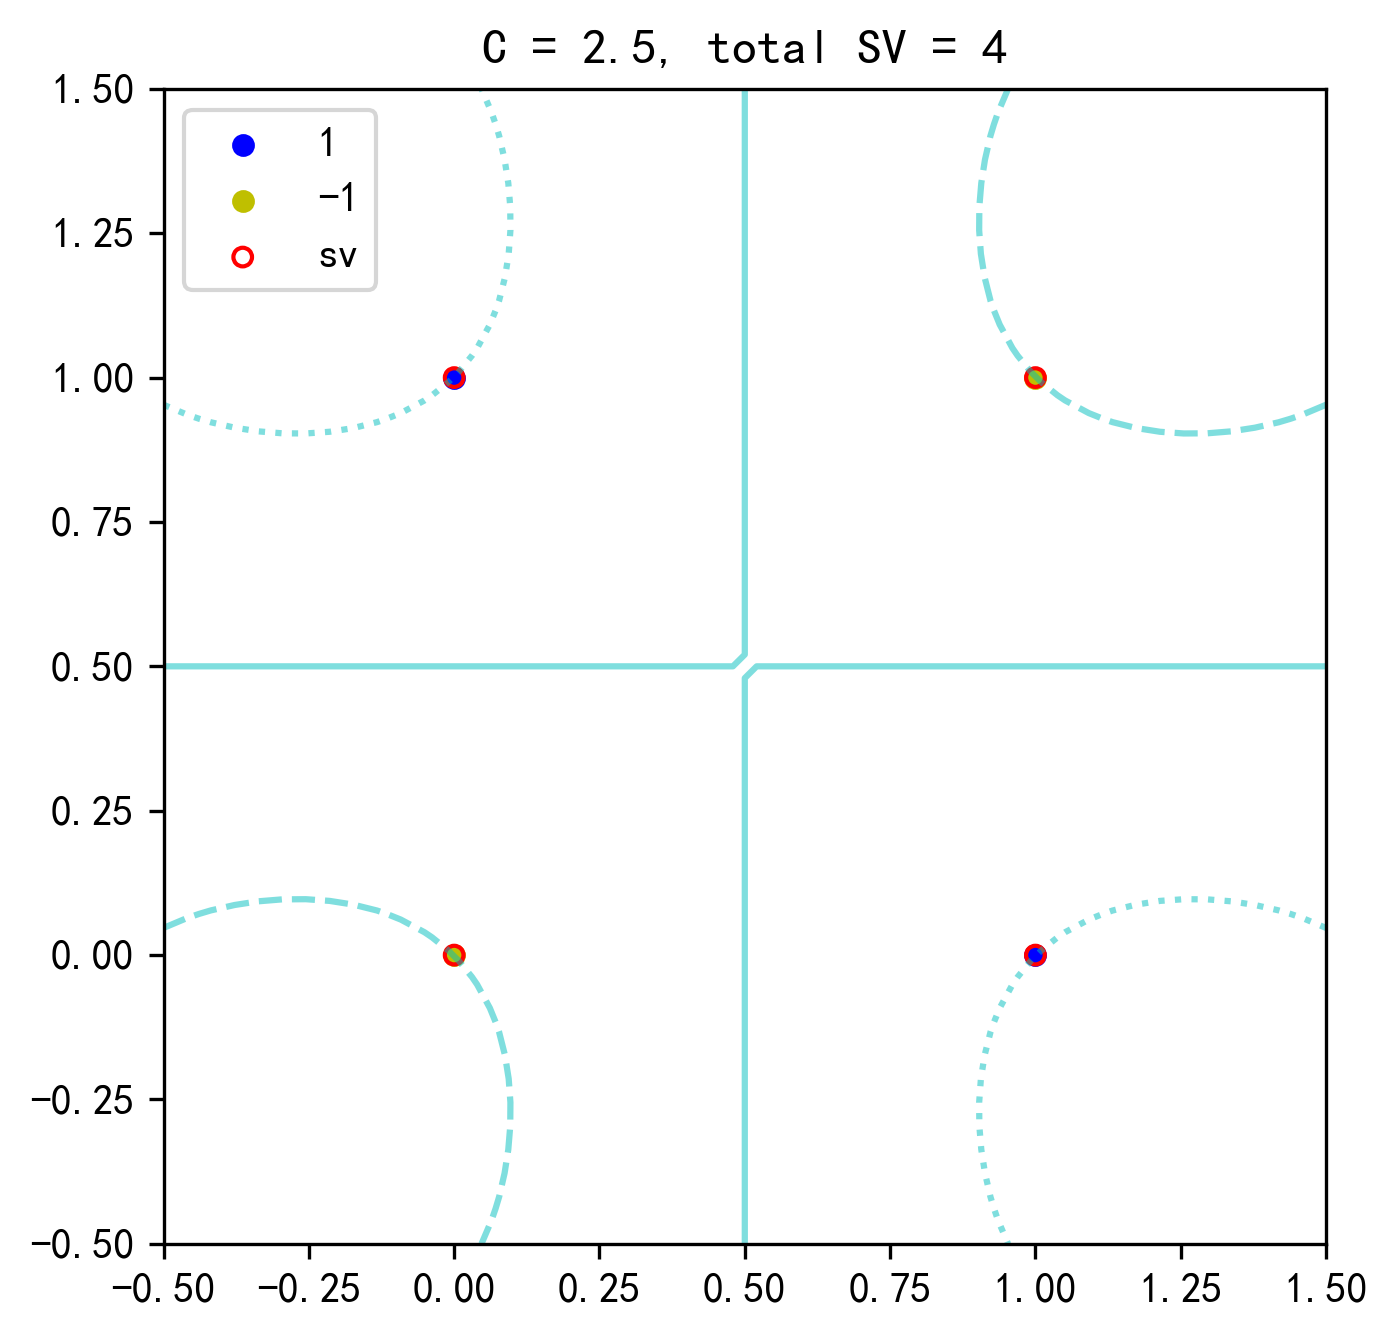

In [7]:
#https://qpsolvers.github.io/qpsolvers/quadratic-programming.html#qpsolvers.solve_qp
import numpy as np
from qpsolvers import Problem, solve_problem
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

C=2.5
X_train=np.array([[0,0],[1,1],[0,1],[1,0]])
y=np.array([-1,-1,1,1])
Y=np.diag(y)
K = rbf_kernel(X_train, Y=None, gamma=1)  
#https://scikit-learn.org.cn/view/567.html,  gamma=1/n_feature
#inear'，'poly'，'polynomial'，'rbf'，'laplacian'
#print('Kernel Matrix =\n',K)
P=np.dot(np.dot(Y,K),Y)
print('P =\n',P)
q = -1*np.ones(4)
A = np.array([[-1,-1,1,1]])
b = np.array([0])
G = np.vstack([-np.eye(4), np.eye(4)])  # 0<=x<=C
h = np.hstack([np.zeros(4),C* np.ones(4)])


problem = Problem(P, q, G, h, A, b)
solution = solve_problem(problem, solver='osqp') 
#qpsolvers.available_solvers = ['cvxopt', 'daqp', 'ecos', 'gurobi', 'highs', 'mosek', 'osqp', 
#'proxqp', 'qpoases', 'qpswift', 'quadprog', 'scs', 'nppro']

print(f"- Solution is{'' if solution.is_optimal(1e-8) else ' NOT'} optimal")
print('Solution vector for the primal quadratic program=\n',solution.x)
#print('Dual multipliers for equality constraints=\n',solution.y)
print('Dual multipliers for linear inequality constraints=\n',solution.z)
print(f"- Primal residual: {solution.primal_residual():.1e}")


plt.rcParams['font.size'] = '10'
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (5, 5) 
idx_1 = np.where(y==1)
p1 = plt.scatter(X_train[idx_1,0], X_train[idx_1,1], marker = 'o', color = 'b', label='1', s = 20)
idx_2 = np.where(y==-1)
p2 = plt.scatter(X_train[idx_2,0], X_train[idx_2,1], marker = 'o', color = 'y', label='-1', s = 20)
ax = plt.gca()
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 50))
xx, yy = np.meshgrid(np.linspace(-0.5,1.5, 50), np.linspace(-0.5, 1.5, 50))
K_classifier = rbf_kernel(np.c_[xx.ravel(), yy.ravel()],X_train, gamma=1)


alpha=solution.x
print(alpha.shape)
sv = np.where(alpha > 1e-4)
b=np.mean(y[sv] -np.dot(K[sv],np.multiply(alpha,y)))
#b=np.mean(y -np.dot(K,np.multiply(alpha,y)))
print('b =',b)
print('predict',np.dot(K,np.multiply(alpha,y) ) + b)
Y_classifiervalue=np.dot(K_classifier,np.multiply(alpha,y) ) + b  
Z=Y_classifiervalue.reshape(xx.shape)
#print('Z',Z)
plt.contour(xx,yy,Z,colors='c',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', ':'])
sv_points = X_train[sv]  #support vectors
plt.scatter(sv_points[:, 0],sv_points[:, 1],s=20,linewidth=1,facecolors='none',edgecolors='r',label='sv')
plt.legend(loc = 'upper left')
title = 'C = ' + str(C) + ', total SV = ' + str(len(alpha[alpha > 10e-4]))
plt.title(title)

9. XOR dataset by qpslves

Polynomial kernel

https://scikit-learn.org.cn/view/566.html

sklearn.metrics.pairwise.polynomial_kernel(X, Y=None, degree=3, gamma=None, coef0=1)

K(X, Y) = (gamma <X, Y> + coef0)^degree

P =
 [[ 1.  1. -1. -1.]
 [ 1.  9. -4. -4.]
 [-1. -4.  4.  1.]
 [-1. -4.  1.  4.]]
Solution vector for the primal quadratic program=
 [3.33333339 2.         2.66666663 2.66666663]
(4,)
b = -0.9999997625694157
predict [-0.99999989 -1.00000011  1.          1.        ]


D:\Software\anaconda\jupyter\Lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
D:\Software\anaconda\jupyter\Lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
D:\Software\anaconda\jupyter\Lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


Text(0.5, 1.0, 'C = 5, total SV = 4')

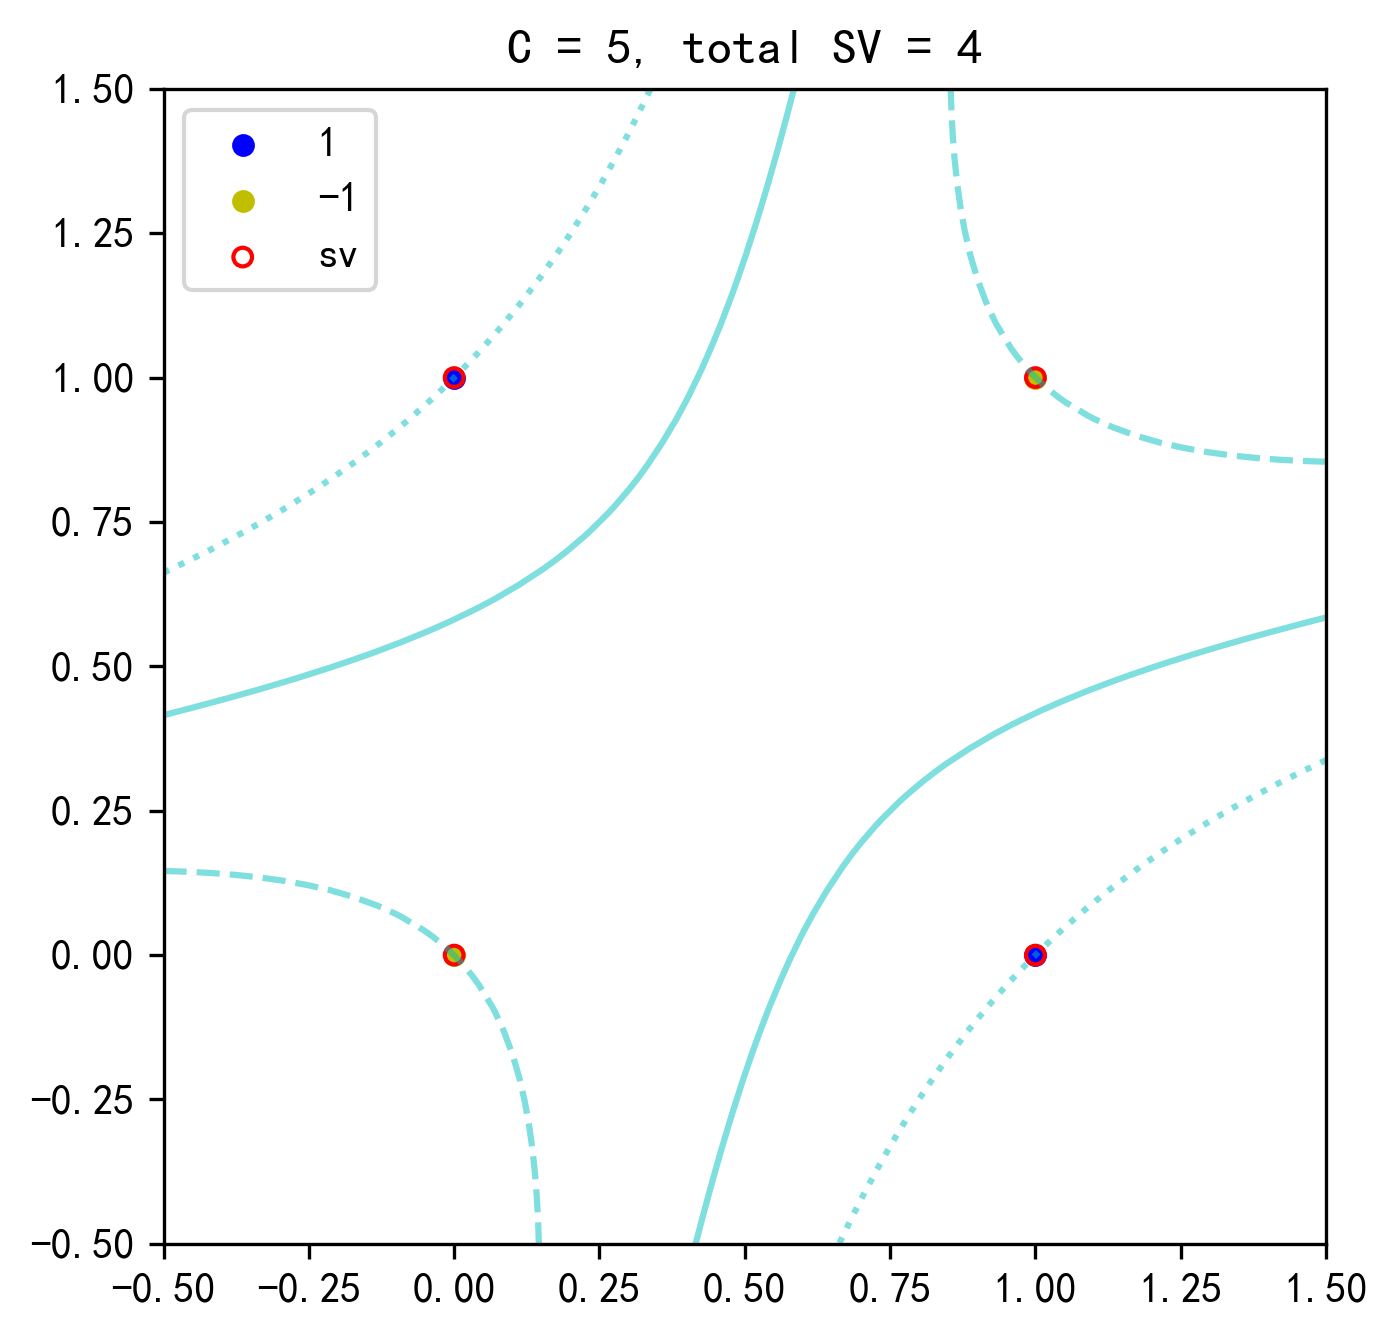

In [8]:
import numpy as np
from qpsolvers import Problem, solve_problem
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import polynomial_kernel

C=5
X_train=np.array([[0,0],[1,1],[0,1],[1,0]])
y=np.array([-1,-1,1,1])
Y=np.diag(y)
#https://scikit-learn.org.cn/view/566.html
K=polynomial_kernel(X_train, Y=None, degree=2, gamma=1, coef0=1) #coef0=0,1
#K = pairwise_kernels(X_train, Y=None, metric='poly')  #https://scikit-learn.org.cn/view/565.html
#inear'，'poly'，'polynomial'，'rbf'，'laplacian'
#print('Kernel Matrix =\n',K)
P=np.dot(np.dot(Y,K),Y)
print('P =\n',P)
q = -1*np.ones(4)
A = np.array([[-1,-1,1,1]])
b = np.array([0])
G = np.vstack([-np.eye(4), np.eye(4)])  # 0<=x<=C
h = np.hstack([np.zeros(4),C* np.ones(4)])


problem = Problem(P, q, G, h, A, b)
solution = solve_problem(problem, solver='osqp') 
#qpsolvers.available_solvers = ['cvxopt', 'daqp', 'ecos', 'gurobi', 'highs', 'mosek', 'osqp', 
#'proxqp', 'qpoases', 'qpswift', 'quadprog', 'scs', 'nppro']

print('Solution vector for the primal quadratic program=\n',solution.x)


plt.rcParams['font.size'] = '10'
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (5, 5) 
idx_1 = np.where(y==1)
p1 = plt.scatter(X_train[idx_1,0], X_train[idx_1,1], marker = 'o', color = 'b', label='1', s = 20)
idx_2 = np.where(y==-1)
p2 = plt.scatter(X_train[idx_2,0], X_train[idx_2,1], marker = 'o', color = 'y', label='-1', s = 20)
ax = plt.gca()
xx, yy = np.meshgrid(np.linspace(-0.5,1.5, 50), np.linspace(-0.5, 1.5, 50))
#X[:, 0].min()-1, X[:, 0].max()+1, X[:, 1].min()-1, X[:, 1].max()+1
K_classifier=polynomial_kernel(np.c_[xx.ravel(), yy.ravel()],X_train, degree=2, gamma=1, coef0=1)

alpha=solution.x
print(alpha.shape)
sv = np.where(alpha > 1e-4)
b=np.mean(y[sv] -np.dot(K[sv],np.multiply(alpha,y)))
#b=np.mean(y -np.dot(K,np.multiply(alpha,y)))
print('b =',b)
print('predict',np.dot(K,np.multiply(alpha,y) ) + b)
Y_classifiervalue=np.dot(K_classifier,np.multiply(alpha,y) ) + b  
Z=Y_classifiervalue.reshape(xx.shape)
#print('Z',Z)
plt.contour(xx,yy,Z,colors='c',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', ':'])
sv_points = X_train[sv]  #support vectors
plt.scatter(sv_points[:, 0],sv_points[:, 1],s=20,linewidth=1,facecolors='none',edgecolors='r',label='sv')
plt.legend(loc = 'upper left')
title = 'C = ' + str(C) + ', total SV = ' + str(len(alpha[alpha > 10e-4]))
plt.title(title)

10. Hard and Soft Linear SVM by qpsolves

P =
 [[ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  1.]
 [ 0.  0.  1.  0. -2. -2.]
 [ 0.  1.  0.  1.  0.  1.]
 [ 0.  0. -2.  0.  4.  4.]
 [ 0.  1. -2.  1.  4.  5.]]
- Solution is NOT optimal
Solution vector for the primal quadratic program=
 [ 0.79844081 -0.00169863  0.80179459  0.80142145  0.7984118  -0.00129803]
Dual multipliers for linear inequality constraints=
 [2.77555756e-18 4.36044264e-01 0.00000000e+00 5.03069808e-18
 0.00000000e+00 7.45720196e-01 3.62358700e-01 0.00000000e+00
 1.15482575e+00 8.39203629e-01 5.27365819e-02 0.00000000e+00]
- Primal residual: 1.8e-03
(6,)
w [0.80142145 0.79502901]
b = -0.7939309116587814
predict value [-7.93930912e-01 -1.59235570e+00 -1.49795789e-03  4.49387368e-03
  7.90934996e-01  1.58935978e+00]
predict label [-1. -1. -1.  1.  1.  1.]


D:\Software\anaconda\jupyter\Lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
D:\Software\anaconda\jupyter\Lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
D:\Software\anaconda\jupyter\Lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


Text(0.5, 1.0, 'C = 0.8, total SV = 4')

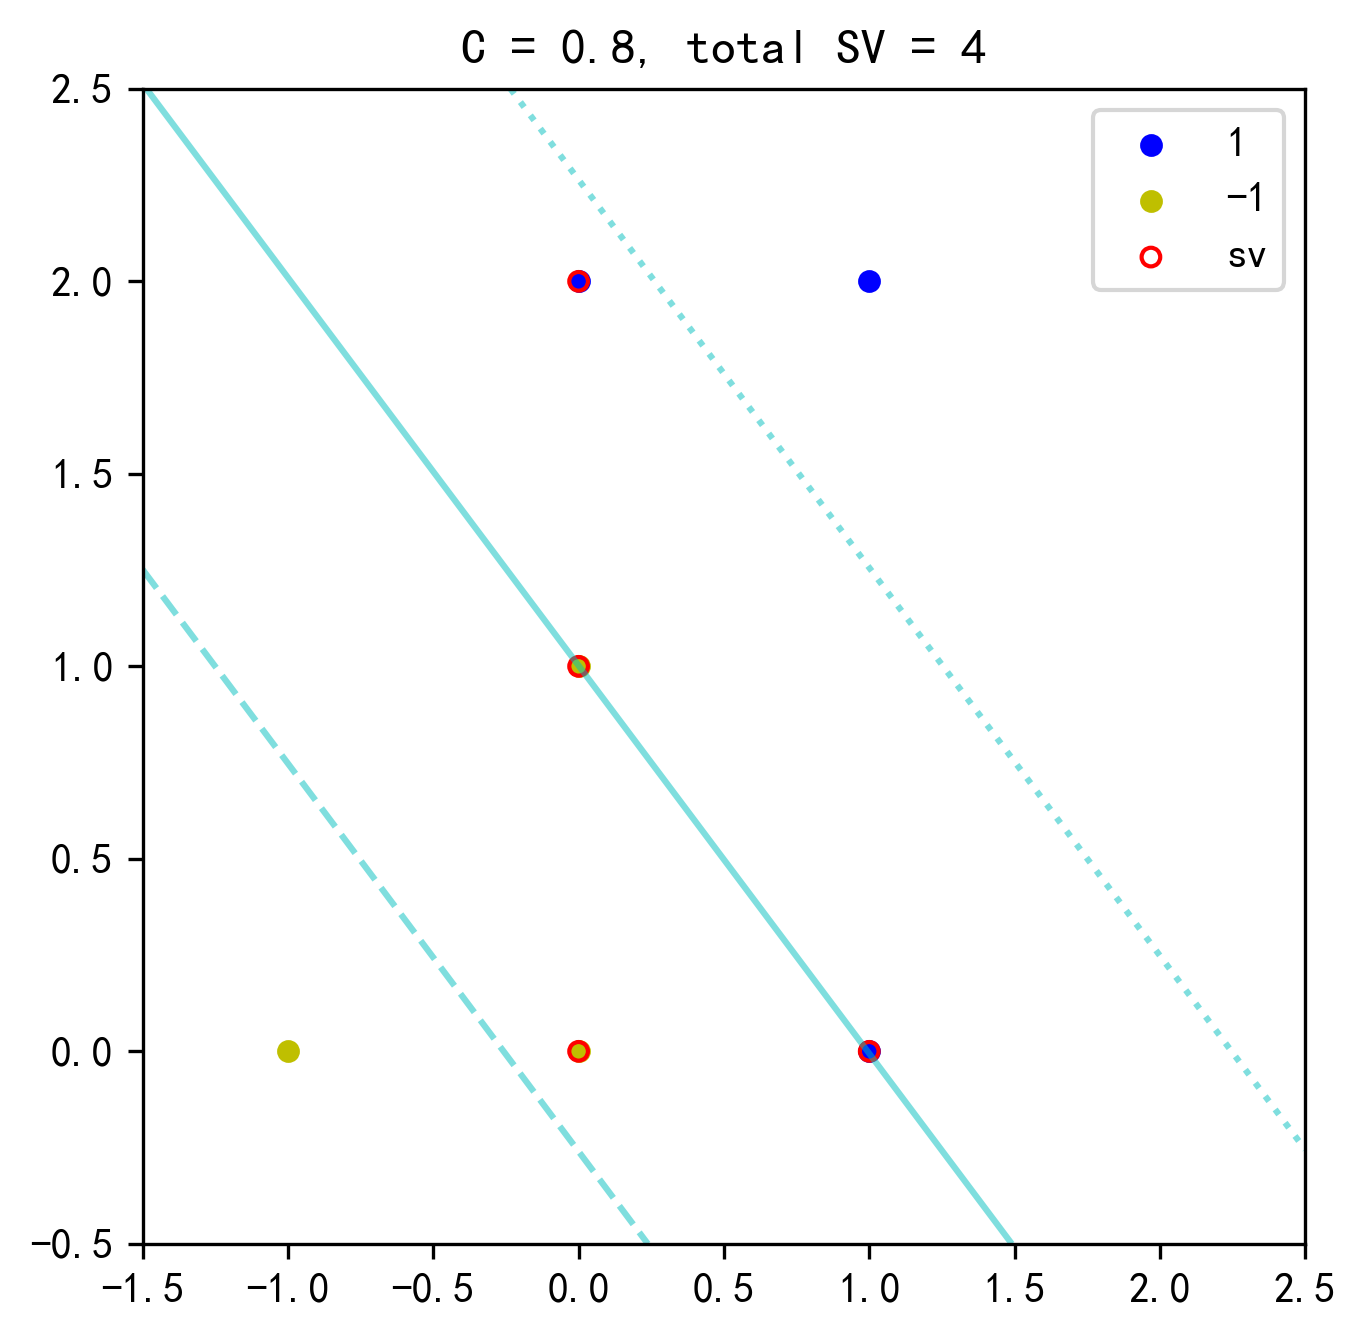

In [11]:
import numpy as np
from qpsolvers import Problem, solve_problem
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_kernels

C=0.8  #C=1, C=10
X_train=np.array([[0,0],[-1,0],[0,1],[1,0],[0,2],[1,2]])
y=np.array([-1,-1,-1,1,1,1])
Y=np.diag(y)
K = pairwise_kernels(X_train, Y=None, metric='linear')  #https://scikit-learn.org.cn/view/565.html
#inear'，'poly'，'polynomial'，'rbf'，'laplacian'
#print('Kernel Matrix =\n',K)
P=np.dot(np.dot(Y,K),Y)
print('P =\n',P)
q = -1*np.ones(6)
A = np.array([[-1,-1,-1,1,1,1]])
b = np.array([0])
G = np.vstack([-np.eye(6), np.eye(6)])  # 0<=x<=C
h = np.hstack([np.zeros(6),C* np.ones(6)])


problem = Problem(P, q, G, h, A, b)
solution = solve_problem(problem, solver='osqp') 
#qpsolvers.available_solvers = ['cvxopt', 'daqp', 'ecos', 'gurobi', 'highs', 'mosek', 'osqp', 
#'proxqp', 'qpoases', 'qpswift', 'quadprog', 'scs', 'nppro']

print(f"- Solution is{'' if solution.is_optimal(1e-8) else ' NOT'} optimal")
print('Solution vector for the primal quadratic program=\n',solution.x)
#print('Dual multipliers for equality constraints=\n',solution.y)
print('Dual multipliers for linear inequality constraints=\n',solution.z)
print(f"- Primal residual: {solution.primal_residual():.1e}")


plt.rcParams['font.size'] = '10'
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (5, 5) 
idx_1 = np.where(y==1)
p1 = plt.scatter(X_train[idx_1,0], X_train[idx_1,1], marker = 'o', color = 'b', label='1', s = 20)
idx_2 = np.where(y==-1)
p2 = plt.scatter(X_train[idx_2,0], X_train[idx_2,1], marker = 'o', color = 'y', label='-1', s = 20)
ax = plt.gca()
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 50))
xx, yy = np.meshgrid(np.linspace(-1.5,2.5, 50), np.linspace(-0.5, 2.5, 50))
K_classifier = pairwise_kernels(np.c_[xx.ravel(), yy.ravel()],X_train, metric='linear')


alpha=solution.x
print(alpha.shape)
sv = np.where(alpha > 1e-4)
w=np.dot(X_train[sv].T,np.multiply(alpha[sv],y[sv]))
print('w',w)
b=np.mean(y[sv] -np.dot(K[sv],np.multiply(alpha,y)))
#b=np.mean(y -np.dot(K,np.multiply(alpha,y)))
print('b =',b)
print('predict value',np.dot(K,np.multiply(alpha,y) ) + b)
print('predict label',np.sign(np.dot(K,np.multiply(alpha,y) ) + b))
Y_classifiervalue=np.dot(K_classifier,np.multiply(alpha,y) ) + b  
Z=Y_classifiervalue.reshape(xx.shape)
#print('Z',Z)
plt.contour(xx,yy,Z,colors='c',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', ':'])
sv_points = X_train[sv]  #support vectors
plt.scatter(sv_points[:, 0],sv_points[:, 1],s=20,linewidth=1,facecolors='none',edgecolors='r',label='sv')
plt.legend(loc = 'upper right')
title = 'C = ' + str(C) + ', total SV = ' + str(len(alpha[alpha > 10e-4]))
plt.title(title)

11. simple circle

rbf kernel

https://scikit-learn.org.cn/view/567.html

sklearn.metrics.pairwise.rbf_kernel(X, Y=None, gamma=None)

K(x, y) = exp(-gamma ||x-y||^2)

gamma 默认为1.0 / n_feature

Solution vector for the primal quadratic program=
 [-7.59727008e-04  1.31027478e+00  1.31027478e+00  1.31027478e+00
  1.31027478e+00  1.31008478e+00  1.31008478e+00  1.31008478e+00
  1.31008478e+00]
(9,)
b = 0.18887065159098437
predict [-1.64248208 -1.00000648 -1.00000648 -1.00000648 -1.00000648  1.00000648
  1.00000648  1.00000648  1.00000648]


D:\Software\anaconda\jupyter\Lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
D:\Software\anaconda\jupyter\Lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
D:\Software\anaconda\jupyter\Lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


Text(0.5, 1.0, 'C = 2, total SV = 8')

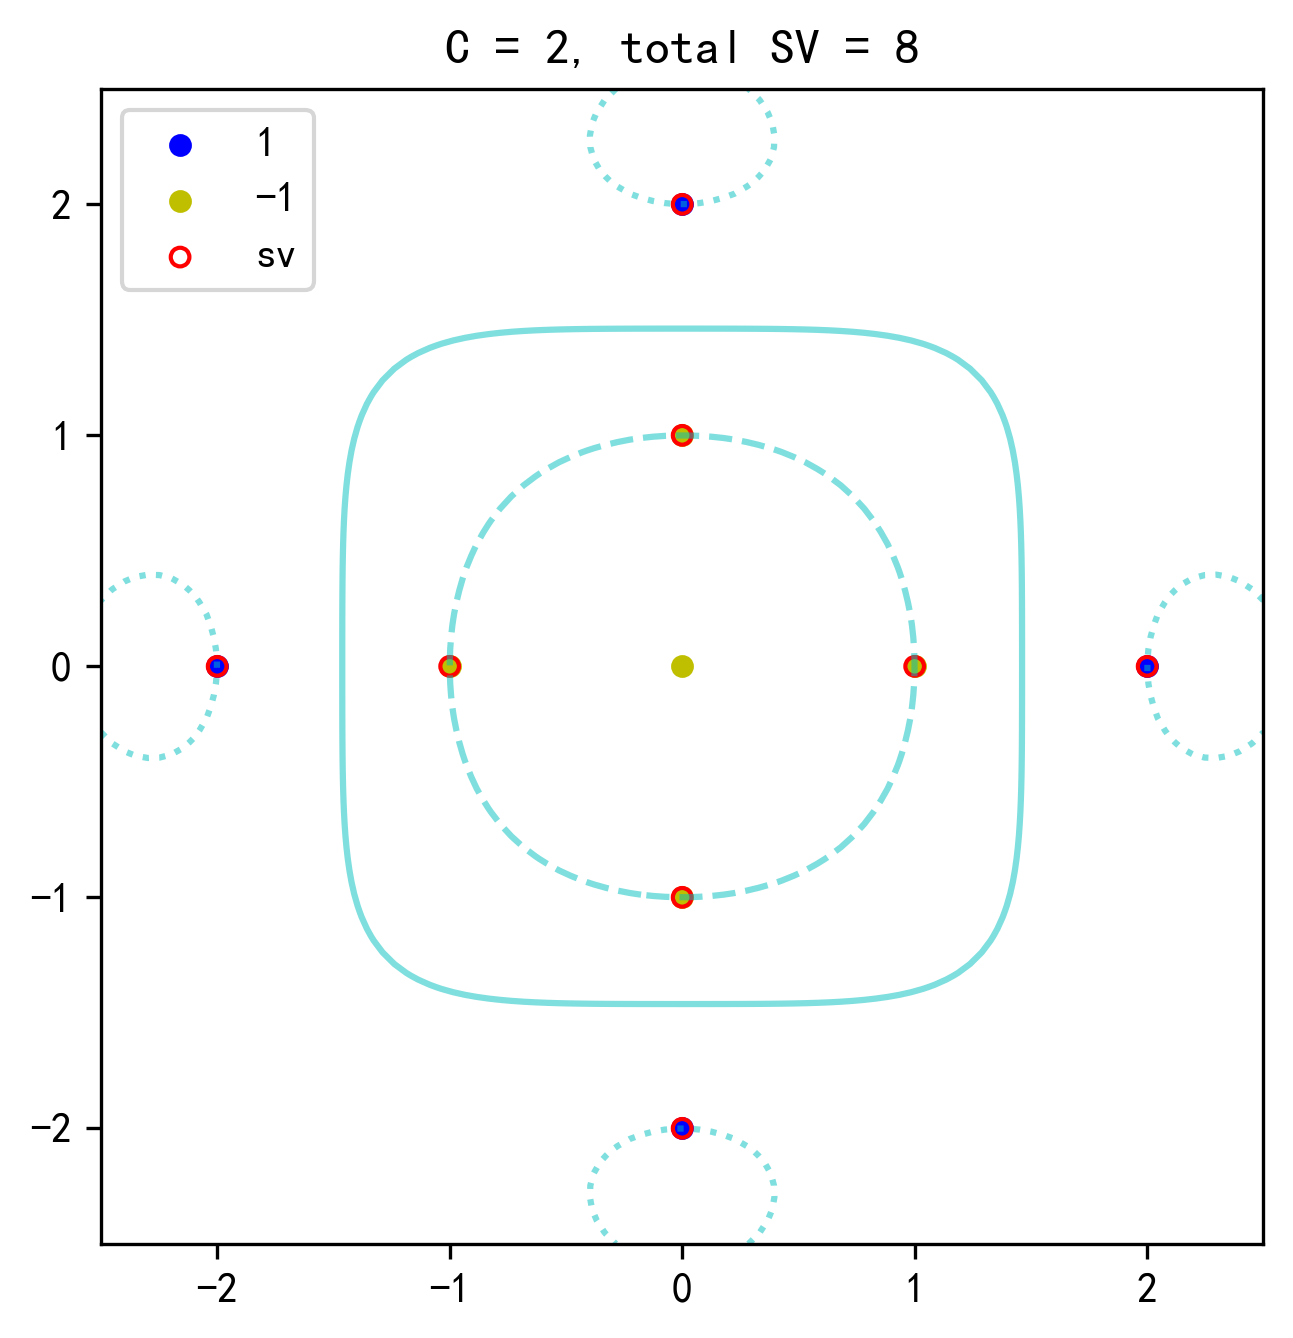

In [10]:
#https://qpsolvers.github.io/qpsolvers/quadratic-programming.html#qpsolvers.solve_qp
import numpy as np
from qpsolvers import Problem, solve_problem
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

C=2
n=9
X_train=np.array([[0,0],[0,1],[1,0],[0,-1],[-1,0],[0,2],[0,-2],[2,0],[-2,0]])
y=np.array([-1,-1,-1,-1,-1,1,1,1,1])
Y=np.diag(y)
K = rbf_kernel(X_train, Y=None, gamma=1) 
#linear'，'poly'，'polynomial'，'rbf'，'laplacian'
#print('Kernel Matrix =\n',K)
P=np.dot(np.dot(Y,K),Y)
#print('P =\n',P)
q = -1*np.ones(n)
A = np.array([[-1,-1,-1,-1,-1,1,1,1,1]])
b = np.array([0])
G = np.vstack([-np.eye(n), np.eye(n)])  # 0<=x<=C
h = np.hstack([np.zeros(n),C* np.ones(n)])


problem = Problem(P, q, G, h, A, b)
solution = solve_problem(problem, solver='osqp') 
#qpsolvers.available_solvers = ['cvxopt', 'daqp', 'ecos', 'gurobi', 'highs', 'mosek', 'osqp', 
#'proxqp', 'qpoases', 'qpswift', 'quadprog', 'scs', 'nppro']

print('Solution vector for the primal quadratic program=\n',solution.x)


plt.rcParams['font.size'] = '10'
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (5, 5) 
idx_1 = np.where(y==1)
p1 = plt.scatter(X_train[idx_1,0], X_train[idx_1,1], marker = 'o', color = 'b', label='1', s = 20)
idx_2 = np.where(y==-1)
p2 = plt.scatter(X_train[idx_2,0], X_train[idx_2,1], marker = 'o', color = 'y', label='-1', s = 20)
ax = plt.gca()
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 50))
xx, yy = np.meshgrid(np.linspace(-2.5,2.5, 100), np.linspace(-2.5, 2.5, 100))
K_classifier = rbf_kernel(np.c_[xx.ravel(), yy.ravel()],X_train,gamma=1)


alpha=solution.x
print(alpha.shape)
sv=np.where(np.logical_and(alpha > 1e-3,alpha<C))
b=np.mean(y[sv] -np.dot(K[sv],np.multiply(alpha,y)))
#b=np.mean(y -np.dot(K,np.multiply(alpha,y)))
print('b =',b)
print('predict',np.dot(K,np.multiply(alpha,y) ) + b)
Y_classifiervalue=np.dot(K_classifier,np.multiply(alpha,y) ) + b  
Z=Y_classifiervalue.reshape(xx.shape)
#print('Z',Z)
plt.contour(xx,yy,Z,colors='c',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', ':'])
sv_points = X_train[sv]  #support vectors
plt.scatter(sv_points[:, 0],sv_points[:, 1],s=20,linewidth=1,facecolors='none',edgecolors='r',label='sv')
plt.legend(loc = 'upper left')
title = 'C = ' + str(C) + ', total SV = ' + str(len(alpha[alpha > 10e-3]))
plt.title(title)